In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


df = pd.read_excel("data.xlsx")
df.head()


,estudiante_id,semestre,promedio_notas,materias_perdidas,asistencia_pct,retrasos,edad,estrato,trabaja,horas_trabajo_sem,...,tendencia_notas,uso_plataforma_horas,participacion_clase_1a5,citas_psicologia,beca,deuda_pension,cambio_programa,repitencias_previas,satisfaccion_programa_1a5,deserto
0,1001,3,3.8,0,92,1,19,3,no,0,...,0.10,25,4,0,si,0,no,0,4,0
1,1002,2,2.6,3,58,7,22,2,si,30,...,-0.35,5,2,1,no,450000,no,1,2,1
2,1003,5,4.1,0,95,0,21,4,no,0,...,0.05,30,5,0,si,0,no,0,5,0
3,1004,1,2.9,2,65,5,24,1,si,36,...,-0.20,8,2,2,no,600000,no,2,1,1
4,1005,4,3.5,1,80,2,20,3,no,0,...,-0.05,18,4,0,si,0,no,0,4,0


### 🏷️ X e Y

In [58]:
X = df.drop(columns=["deserto"])
y = df["deserto"]


### Variables categoricas


In [59]:
X = pd.get_dummies(X, drop_first=True)

### Train / Test Split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Random Forest

In [61]:

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

### Accuracy

In [62]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

ROC-AUC: 1.0


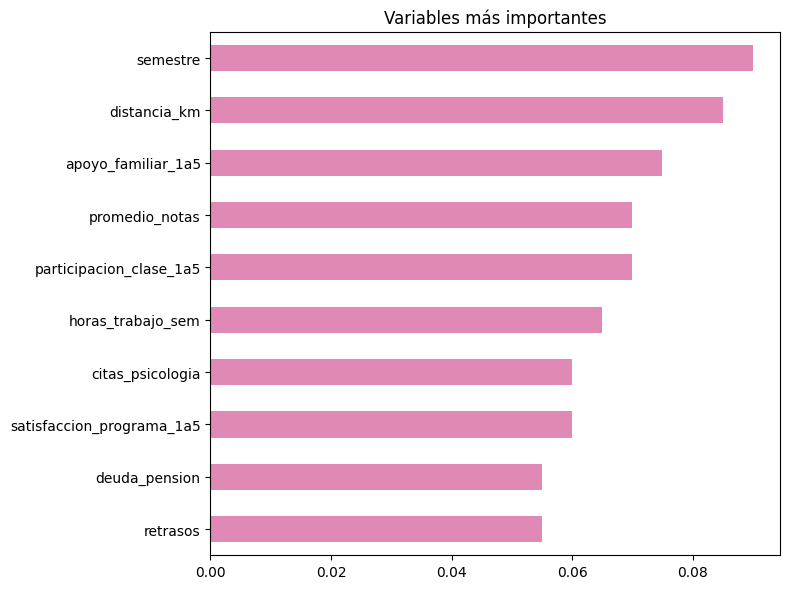

In [63]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top.plot(kind="barh", color="#df89b4")  

plt.title("Variables más importantes")
plt.gca().invert_yaxis()  

plt.gcf().patch.set_alpha(0)      
plt.gca().patch.set_alpha(0)     

plt.tight_layout()
plt.show()

In [64]:
df_resultados = X_test.copy()
df_resultados["prob_desercion"] = y_prob
df_resultados["riesgo"] = (df_resultados["prob_desercion"] > 0.6).astype(int)

df_resultados.head()


,estudiante_id,semestre,promedio_notas,materias_perdidas,asistencia_pct,retrasos,edad,estrato,horas_trabajo_sem,distancia_km,...,trabaja_si,nivel_padres_secundaria,nivel_padres_tecnica,nivel_padres_universitaria,internet_casa_si,computador_propio_si,beca_si,cambio_programa_si,prob_desercion,riesgo
13,1014,3,3.2,1,78,3,20,3,18,8.0,...,True,True,False,False,True,True,False,True,0.020,0
10,1011,2,2.8,2,62,6,23,2,28,14.5,...,True,False,False,False,False,False,False,False,0.995,1
24,1025,4,3.8,0,89,1,22,3,0,4.8,...,False,False,True,False,True,True,True,False,0.000,0
11,1012,5,4.0,0,94,0,21,4,0,3.0,...,False,False,False,True,True,True,True,False,0.000,0
17,1018,3,3.0,1,74,3,20,3,22,9.8,...,True,True,False,False,True,True,False,True,0.085,0
